# **Capstone project: Providing data-driven suggestions for HR**

## Description
Analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

## Deliverables
* A brief one-page summary of this project for external stakeholders. 
* The complete code notebook of the project (this document). 

## Summary
The deliverables include the model evaluation and interpretation, data visualizations, ethical considerations.


# 1. Plan Stage

## Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to me as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. 

**They have the following question: \
what’s likely to make the employee leave the company?**

**Goal of this project**: analyze the data collected by the HR department to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## The HR dataset

The dataset is available on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).
The dataset contains 15,000 rows and 10 columns, variables listed below. 


Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [3]:
# Import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Load dataset
The dataset is in the file **`HR_capstone_dataset.csv`.**  

In [4]:
# Load dataset into a dataframe
df0 = pd.read_csv("capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Initial exploratory data analysis and data cleaning
- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)

In [5]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns
Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
df0.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
# Rename specific columns
new_names = {'number_project': 'number_projects'
             , 'time_spend_company': 'time_spent_company'
            , 'Work_accident':'work_accident'
             , 'promotion_last_5years':'promotion_last_5_years'
             , 'Department':'department'
             , 'left':'left_yn'
            }
data = df0.copy()
data = data.rename(columns=new_names)

# Display all column names after the update
data.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_montly_hours', 'time_spent_company', 'work_accident',
       'left_yn', 'promotion_last_5_years', 'department', 'salary'],
      dtype='object')

### Check for missing values

In [10]:
# Check for missing values
data.isna().any()

satisfaction_level        False
last_evaluation           False
number_projects           False
average_montly_hours      False
time_spent_company        False
work_accident             False
left_yn                   False
promotion_last_5_years    False
department                False
salary                    False
dtype: bool

Result: no apparent missing value in the data

### Check for duplicates

In [11]:
# Check for duplicates
print(data.duplicated().any())

True


In [12]:
# Count duplicates
data.duplicated().sum()

np.int64(3008)

In [13]:
# Inspect some rows containing duplicates
data[data.duplicated()].head()

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spent_company,work_accident,left_yn,promotion_last_5_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [14]:
# Drop duplicates
data.drop_duplicates(keep='first', inplace=True)

# Check that there are no remaining duplicated data
print(data.duplicated().any())

# Display first few rows of new dataframe
data.head()

False


,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spent_company,work_accident,left_yn,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check for outliers
Certain types of models are more sensitive to outliers than others. Therefore, we should consider whether to remove the outliers.

In [15]:
# Check the data types, in particular to isolate categorical data.
data.dtypes

satisfaction_level        float64
last_evaluation           float64
number_projects             int64
average_montly_hours        int64
time_spent_company          int64
work_accident               int64
left_yn                     int64
promotion_last_5_years      int64
department                 object
salary                     object
dtype: object

In [16]:
# Explore the range of the categorical data
print(
    "salary range: ", data.salary.unique(), 
    "\ndepartment range: ", data.department.unique()
)

salary range:  ['low' 'medium' 'high'] 
department range:  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


# 3. Construct Stage – Model Building
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


### Since the outcome is categorical, we may use Logistic Regression or Tree based models.

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

**Tree model assumptions**
- No assumption of a linear relationship between features and target.
- No assumptions of any specific distribution of the target or features.
- No requirement for independence of observations.
- Can handle multicollinearity between features, but highly correlated features may lead to biased results.
- Less sensitive to outliers.
- Suitable for large datasets and can handle many features.

### A. Modeling Approach – Logistic Regression Model
**Use logistic regression to fit the data.**

First steps: prepare the data.
- The logistic regression is sensitive to outliers. Therefore, we will mask the outliers, which are the employees who spent at the company 6 or more years. 
- We need to one-hot encode the categoric data, which means the variables "salary" and "department".

In [17]:
# Import basic packages
import numpy
from sklearn import linear_model 

# Import packages for metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Masks the outliers
mask_outliers = data.time_spent_company <= 5 # Boolean mask
data_model = data[mask_outliers] # dataframe that the model will fit

# One-hot encode the "salary" and "department" variables.
data_model = pd.get_dummies(data_model, 
                            columns = ['salary', 'department'], # columns to encode
                            prefix=['salary', 'dept'], # set a prefix for the new column
                            drop_first=False # drop the first column to mitigate multicollinearity
                           )
data_model.head() # display the dataframe prepared for fitting with a regression model.

,satisfaction_level,last_evaluation,number_projects,average_montly_hours,time_spent_company,work_accident,left_yn,promotion_last_5_years,salary_high,salary_low,...,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,False,True,...,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,False,True,...,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,False,True,...,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,False,True,...,False,False,False,False,False,False,False,True,False,False


- Split the data in subsets to train the model.

In [18]:
# Isolate X (inputs) and y (outcome) variable of the model
X = data_model.drop(['left_yn'], axis=1) # data for X variables
y = data_model.left_yn # data for y variable, if an employee left or not

# split the data in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, y,          # data to split
                                                    test_size=0.2, # size of the test data is 20%
                                                    random_state=1 # define a random state to be traceable
                                                   )

# verify that train and test data are balanced
# count the fraction of stayed:0 vs left:1 in the training data
print("Train: stayed vs left \n",
    y_train.value_counts(normalize=True))
print()
print("Test: stayed vs left \n",
    y_test.value_counts(normalize=True))

Train: stayed vs left 
 left_yn
0    0.832195
1    0.167805
Name: proportion, dtype: float64

Test: stayed vs left 
 left_yn
0    0.828559
1    0.171441
Name: proportion, dtype: float64


- Fit the logistic regression model to the training data.

In [64]:
# Fit the logistic regression model to the data
logr = linear_model.LogisticRegression(
                                        random_state=1, 
                                        max_iter=500
                                        ).fit(X_train, y_train)


# Gather some info about the fit, as the resulting slopes and intercept values.

# Create a DataFrame of the coefficients/slopes with index names from X.columns
coefficients = pd.DataFrame(logr.coef_, columns=X.columns).transpose()  
coefficients.columns = ['Coefficient/Slope']  # Titles the dataframe 'Coefficient/Slope'

# Create a DataFrame for the intercept value
intercept = pd.DataFrame(logr.intercept_, index=["Intercept"], columns=[""])  

# print clopes and intercept(s)
print(coefficients) 
print(intercept) 

                        Coefficient/Slope
satisfaction_level              -4.563046
last_evaluation                 -0.041630
number_projects                 -0.469832
average_montly_hours             0.003314
time_spent_company               1.033525
work_accident                   -1.575560
promotion_last_5_years          -0.492370
salary_high                     -1.227180
salary_low                       0.227387
salary_medium                   -0.113613
dept_IT                         -0.178287
dept_RandD                      -0.404420
dept_accounting                 -0.098038
dept_hr                         -0.017127
dept_management                 -0.049621
dept_marketing                  -0.175407
dept_product_mng                -0.230783
dept_sales                       0.055461
dept_support                    -0.016877
dept_technical                   0.001694
                   
Intercept -1.239503


- Calculate the probability of an employee to stay or leave

In [84]:
# Function creating the dataframe of employee probability
def probabilities(model, X): 
    # model: The trained machine learning model capable of predicting probabilities.
    # X: The input data representing employee features.
    # Returns: DataFrame containing the predicted probabilities of staying or leaving for each employee.
    
    X_2d = np.atleast_2d(X) # ensures that X is a 2D array to avoid ValueError 
    
    # Creates a DataFrame with predicted probabilities
    probability = pd.DataFrame(
                    model.predict_proba(X_2d), 
                    columns=["prob_stay", "prob_leave"])
    
    return probability


# Calculate and print the probabilities using a subset of the test_values
x_prob = X_test[0:10]
prob = probabilities(logr, x_prob) 
prob["employee_index"] = x_prob.index
print(prob)

   prob_stay  prob_leave  employee_index
0   0.684370    0.315630            2192
1   0.993578    0.006422            3103
2   0.564365    0.435635            8169
3   0.642128    0.357872            1130
4   0.517869    0.482131            7587
5   0.873175    0.126825            1251
6   0.193327    0.806673            2968
7   0.985547    0.014453            5506
8   0.995796    0.004204            3684
9   0.148183    0.851817            4009


- predict data using the fitted model

In [86]:
# predict the test set
# the predicted data are used to evaluate the model
y_pred = logr.predict(X_test)

- Calculate the confusion matrix between predicted and test data

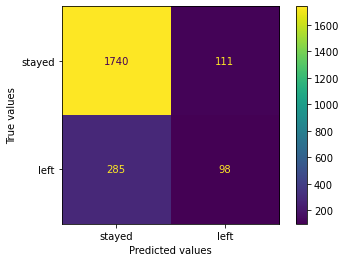

In [92]:
# Compute the confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=logr.classes_)

# Create the display of the confusion matrix
log_disp = ConfusionMatrixDisplay(
                                confusion_matrix=log_cm, # confusion matrix to plot
                                display_labels=["stayed", "left"] # labels of the categories
                                )

# Plot confusion matrix
log_disp.plot()
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.show()

- Create a classification report

In [109]:
# Create a classification report for the logistic regression model
target_names = ['Predicted would NOT leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would NOT leave       0.86      0.94      0.90      1851
    Predicted would leave       0.47      0.26      0.33       383

                 accuracy                           0.82      2234
                macro avg       0.66      0.60      0.61      2234
             weighted avg       0.79      0.82      0.80      2234



### Interpretation of the classification report
  - **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
  - **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
  - **Accuracy** measures the proportion of data points that are correctly classified.
  - **F1-score** is an aggregation of precision and recall.
  
**Summary:** The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

### B. Modeling Approach – Tree-based Model
**Use a decision tree to fit the data.**

First steps: prepare the data.
- Decision trees are not very sensitive to outliers. Therefore, we don't need to mask the outliers (employees who spent at the company 6 or more years). 
- We need to one-hot encode the categoric data, which means the variables "salary" and "department".
- Isolate X (inputs) and y (outcome) variables of the model.

In [19]:
# Import basic packages
import numpy
from sklearn import linear_model 

# Import packages for metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# dataframe that the model will fit
data_model = data 

# One-hot encode the "salary" and "department" variables.
data_model = pd.get_dummies(data_model, 
                            columns = ['salary', 'department'], # columns to encode
                            prefix=['salary', 'dept'], # set a prefix for the new column
                            drop_first=False # drop the first column to mitigate multicollinearity
                           )
#data_model.head() # display the dataframe prepared for fitting with a regression model.

# Isolate X (inputs) and y (outcome) variable of the model
X = data_model.drop(['left_yn'], axis=1) # data for X variables
y = data_model.left_yn # data for y variable, if an employee left or not

- Split the data in 3 groups: train, validation and test data

In [20]:
# split the data in train and test dataset
X_rest, X_test, y_rest, y_test = train_test_split(
                                                    X, y, # data to split
                                                    stratify=y, # ensure % of left/stayed as in y        
                                                    test_size=0.2, # size of the test data is 20%
                                                    random_state=1 # define a random state to be traceable
                                                   )

# split the data in train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(
                                                    X_rest, y_rest, # data to split
                                                    stratify=y_rest, # ensure % of left/stayed as in y_rest
                                                    test_size=0.25, # size of the test data is 20%
                                                    random_state=1 # define a random state to be traceable
                                                   )

# verify that train, validation and test data are balanced
# count the fraction of stayed:0 vs left:1 in the training data
print("Train: stayed vs left \n",
    y_train.value_counts(normalize=True))
print()
print("Validation: stayed vs left \n",
    y_val.value_counts(normalize=True))
print()
print("Test: stayed vs left \n",
    y_test.value_counts(normalize=True))

Train: stayed vs left 
 left_yn
0    0.833889
1    0.166111
Name: proportion, dtype: float64

Validation: stayed vs left 
 left_yn
0    0.834028
1    0.165972
Name: proportion, dtype: float64

Test: stayed vs left 
 left_yn
0    0.834098
1    0.165902
Name: proportion, dtype: float64


In [21]:
### Decision Tree model building ###
#     Construct a decision tree model and set up cross-validated grid-search 
#     to exhuastively search for the best model parameters.

# Step 1: Import the necessary module for a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Step 2: Instantiate the Decision Tree Classifier model with a fixed random state for reproducibility
tree = DecisionTreeClassifier(random_state=0)  # random_state ensures consistent results when running the code

# Step 3: Define a dictionary containing the hyperparameters to test during the grid search
cv_params = {
    'max_depth': [4, 6, 8, None],  # List of possible Maximum depth of the tree (None means no limit, allowing the tree to expand fully)
    'min_samples_leaf': [2, 5, 1],  # List of possible Minimum number of samples required to be at a leaf node
    'min_samples_split': [2, 4, 6]  # List of possible Minimum number of samples required to split an internal node
}

# Step 4: Define the performance metrics to evaluate during the grid search
# Metrics used to evaluate model performance
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}
# - accuracy: Overall accuracy of the model
# - precision: Proportion of positive identifications that were correct
# - recall: Proportion of actual positives correctly identified
# - f1: Weighted average of precision and recall
# - roc_auc: Area under the ROC curve, measuring model's ability to distinguish between classes
# Correct scoring dictionary


# Step 5: Instantiate the GridSearchCV object for hyperparameter tuning with cross-validation
tree1 = GridSearchCV(
    tree,  # The Decision Tree model
    cv_params,  # Hyperparameters to search over
    scoring=scoring,  # Metrics to evaluate during the search
    cv=4,  # Number of cross-validation folds (split data into 4 folds for training/testing)
    refit='roc_auc'  # Refit the model using the hyperparameter combination that maximizes the 'roc_auc' metric
)

# Explanation of GridSearchCV:
# - GridSearchCV performs an exhaustive search over all specified hyperparameter combinations.
# - Each combination is evaluated using cross-validation to ensure robust performance.
# - Multiple scoring metrics are captured, but the model will be optimized based on the 'roc_auc' metric.
# – roc_auc stands for the Receiver Operating Characteristic - Area Under the Curve. 
#   The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate (1 - Specificity) at different threshold values.
#   The Area Under the Curve (AUC) quantifies the model's ability to distinguish between positive and negative classes.
#      AUC = 1.0 → Perfect model.
#      AUC = 0.5 → Random guessing (no discrimination).
#   roc_auc is a great choice for maximizing the ability to distinguish between positive and negative classes.

In [22]:
# Fit the decision tree model to the training data.

import time

# Start timer
start_time = time.time()

# Fit the model
verbose = tree1.fit(X_train, y_train)
print(verbose)

# End timer and print elapsed time
end_time = time.time()
print(f"Execution Time: {end_time - start_time:.2f} seconds")

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})
Execution Time: 4.01 seconds


In [23]:
# Identify the optimal values for the decision tree parameters.

tree1.best_params_ # Check best parameters

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [24]:
# Identify the best AUC score achieved by the decision tree model on the training set.

tree1.best_score_ # Check best AUC score on CV

np.float64(0.9713879861339226)

In [ ]:
# This is a strong AUC score, which shows that this model can predict employees who will leave very well.

In [25]:
# Next, we can write a function to help you extract all the scores from the grid search.

def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc. Metric score to maximize.
                         Choose the row of the dataframe with the max(metric) score
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                 'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create a DataFrame with the results
    table = pd.DataFrame([{
        'Model': model_name,
        'AUC': auc,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Accuracy': accuracy,
    }])
  
    return table

# Use the function just defined to get all the scores from grid search.
tree1_cv_results = make_results('decision tree cv', tree1, 'auc') # Get all CV scores
tree1_cv_results

,Model,AUC,Precision,Recall,F1,Accuracy
0,decision tree cv,0.971388,0.968588,0.903762,0.934994,0.97915


In [ ]:
# All of these high scores are strong indicators of good model performance.

In [ ]:
# However, decision trees can be vulnerable to overfitting, 
# and random forests avoid overfitting by incorporating multiple trees 
# to make predictions. We can construct a random forest model next.

In [26]:
### Random Forest ###
# Construct a random forest model and set up cross-validated grid-search 
# to exhuastively search for the best model parameters.

In [29]:
# Step 1: Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 2: Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=0)
# RandomForestClassifier is an ensemble learning method that combines multiple decision trees
# to improve predictive performance and reduce overfitting.
# `random_state=0` select a specific state to ensures reproducibility of the results.

# Step 3: Define hyperparameters to search over during grid search
cv_params = {
    'max_depth': [3, 5, None],  # List of possible "Maximum Depth" of each tree
    # - 3, 5: Restricts the depth to prevent overfitting by limiting tree complexity.
    # - None: Allows trees to grow fully, which may overfit but captures all data patterns.

    'max_features': [1.0],  # The number of "Features" to consider for each split.
    # - 1.0 means all features are used (default for Random Forest).
    # ex. for the current dataset, the features are the keys
    # X_train.keys() --> ['satisfaction_level', 'last_evaluation', 'number_projects',
       #'average_montly_hours', 'time_spent_company', 'work_accident',
       #'promotion_last_5_years', 'salary_high', 'salary_low', 'salary_medium',
       #'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr',
       #'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales',
       #'dept_support', 'dept_technical']
    # If max_features = 4, at each split in the tree, the algorithm randomly selects only 4 out of these.

    'max_samples': [0.7, 1.0],  # List of possible "Fraction of the Dataset" to sample for each tree.
    # - 0.7 means each tree is trained on 70% of the dataset.
    # - 1.0 means each tree uses the full dataset.

    'min_samples_leaf': [1, 2, 3],  # List of possible "Minimum Number of Samples" required in a leaf node.
    # - Lower values (e.g., 1) allow small, highly specific leaf nodes, which may overfit.
    # - Higher values (e.g., 3) create more generalized leaf nodes to reduce overfitting.

    'min_samples_split': [2, 3, 4],  # List of possible "Minimum Number of Samples" required to split a node.
    # - Higher values (e.g., 3, 4) make the trees less complex by requiring more samples to split.

    'n_estimators': [5, 10, 20, 100],  # List of possible "Number of Trees" in the Random Forest.
    # - More trees generally improve performance but increase computation time.
    #   50–200 trees for small datasets and fast computation
    #   ~ 300 trees for larger datasets 
    #   500-1000 trees for large datasets and best accuracy

}

# Step 4: Define scoring metrics for evaluation during grid search
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}
# This set of metrics evaluates various performance aspects:
# - accuracy: Percentage of correct predictions.
# - precision: Proportion of true positives among all predicted positives.
# - recall: Proportion of actual positives correctly identified.
# - f1: Harmonic mean of precision and recall.
# - roc_auc: Area Under the Receiver Operating Characteristic Curve, useful for binary classification.

# Step 5: Set up GridSearchCV for hyperparameter tuning and cross-validation
rf1 = GridSearchCV(
    estimator=rf,  # The Random Forest model to optimize.
    param_grid=cv_params,  # Hyperparameter combinations to test.
    scoring=scoring,  # Metrics to evaluate during cross-validation.
    cv=4,  # Number of folds for cross-validation (data is split into 4 folds).
    refit='roc_auc',  # After grid search, refit the model using the best hyperparameters based on roc_auc.
    verbose=2  # This adds progress logs to track training. Increase number for more log levels.
)


In [30]:
# Fit the random forest model to the training data.
rf1.fit(X_train, y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits
[CV] END max_depth=3, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=3, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.1s
[CV] END max_depth=3, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=3, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=3, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=3, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=3, max_features=1.0, max_samples=0.7, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [5, 10, 20, 100]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=2)

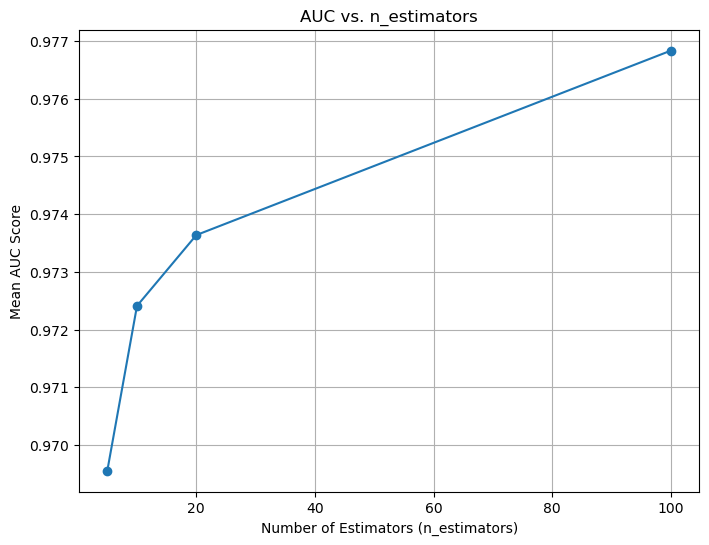

In [31]:
### extract and plot the AUC vs. n_estimators ###
# to determine the best n_estimators

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Access the cv_results_ from the GridSearchCV object
cv_results = pd.DataFrame(rf1.cv_results_)

# Step 2: Extract relevant columns
# Filter the columns for mean_test_roc_auc and param_n_estimators
auc_vs_estimators = cv_results[['param_n_estimators', 'mean_test_roc_auc']]

# Step 3: Group by n_estimators and calculate the mean AUC (in case of repeated values)
auc_vs_estimators = auc_vs_estimators.groupby('param_n_estimators').mean()

# Step 4: Plot AUC vs. n_estimators
plt.figure(figsize=(8, 6))
plt.plot(auc_vs_estimators.index, auc_vs_estimators['mean_test_roc_auc'], marker='o', linestyle='-')
plt.title('AUC vs. n_estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Mean AUC Score')
plt.grid()
plt.show()


In [ ]:
# The elbow around 20 estimators signifies that this may be the best number

In [32]:
### Let's save the model to a folder ###
path = '/Users/damiano/Desktop/GDA/Advanced GDA - Capstone/' # path to the folder

# Define functions to pickle the model and read in the model.
import pickle

def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

# Use the functions defined above to save the model in a pickle file and then read it in.
write_pickle(path, rf1, 'hr_rf1') # Write pickle
rf1 = read_pickle(path, 'hr_rf1')# Read pickle

In [34]:
### Identify the best AUC score achieved by the random forest model on the training set. ###

# Check best AUC score on CV
rf1.best_score_

np.float64(0.9802436164343101)

In [35]:
# Identify the optimal values for the parameters of the random forest model.

rf1.best_params_ # Check best params

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [36]:
### Collect the evaluation scores on the training set for the decision tree and random forest models.

# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              Model       AUC  Precision    Recall        F1  Accuracy
0  decision tree cv  0.971388   0.968588  0.903762  0.934994   0.97915
              Model       AUC  Precision    Recall        F1  Accuracy
0  random forest cv  0.980244   0.954911  0.904595  0.929028  0.977065


The evaluation scores of the random forest model are similar to those 
of the decision tree model, with a slightly better AUC
This indicates that the random forest model mostly outperforms the decision tree model
for the scope of differentiation. 

In [37]:
### Now, we can evaluate these models on the validation dataset. ###
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, roc_auc_score, roc_curve

# Define a function that gets all the scores from a model's predictions.
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = round(roc_auc_score(y_test_data, preds), 3)
    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name],
                        'AUC': [auc],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
    return table

# Get the results on validation set for both models
tree1_val_results = get_scores('decision tree1 val', tree1, X_val, y_val)
rf1_val_results = get_scores('random forest1 val', rf1, X_val, y_val)

# Concatenate validation scores into table
all_val_results1 = [tree1_val_results, rf1_val_results]
all_val_results1 = pd.concat(all_val_results1).sort_values(by='AUC', ascending=False)
all_val_results1

,model,AUC,precision,recall,f1,accuracy
0,decision tree1 val,0.957,0.971,0.92,0.945,0.982
0,random forest1 val,0.956,0.958,0.92,0.938,0.980


**On the validation set, the decision tree model outperforms the random forest model across most metrics.**

In [38]:
# Now use the two models to predict on the test set.

# Get the results on validation set for both models
tree1_test_results = get_scores('decision tree1 test', tree1, X_test, y_test)
rf1_test_results = get_scores('random forest1 test', rf1, X_test, y_test)

# Concatenate validation scores into table
all_test_results1 = [tree1_test_results, rf1_test_results]
all_test_results1 = pd.concat(all_test_results1).sort_values(by='AUC', ascending=False)
all_test_results1

,model,AUC,precision,recall,f1,accuracy
0,decision tree1 test,0.954,0.966,0.915,0.939,0.98
0,random forest1 test,0.954,0.960,0.915,0.937,0.98


**The test scores are very similar to the validation scores, which is good signal of a strong model.**

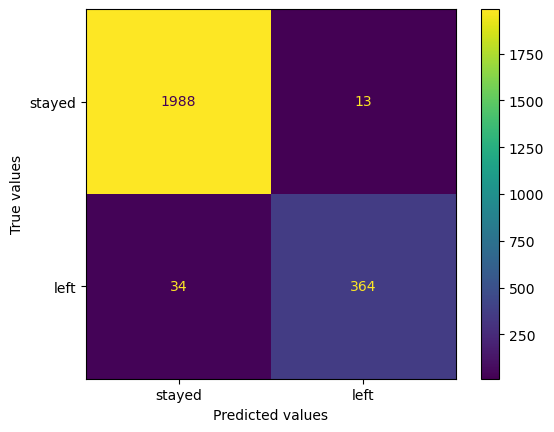

In [40]:
# Generate array of values for confusion matrix
preds = tree1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=tree1.classes_)

# Create the display of the confusion matrix
cm_disp = ConfusionMatrixDisplay(
                                confusion_matrix=cm, # confusion matrix to plot
                                display_labels=["stayed", "left"] # labels of the categories
                                )

# Plot confusion matrix
cm_disp.plot()
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.show()

For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model.

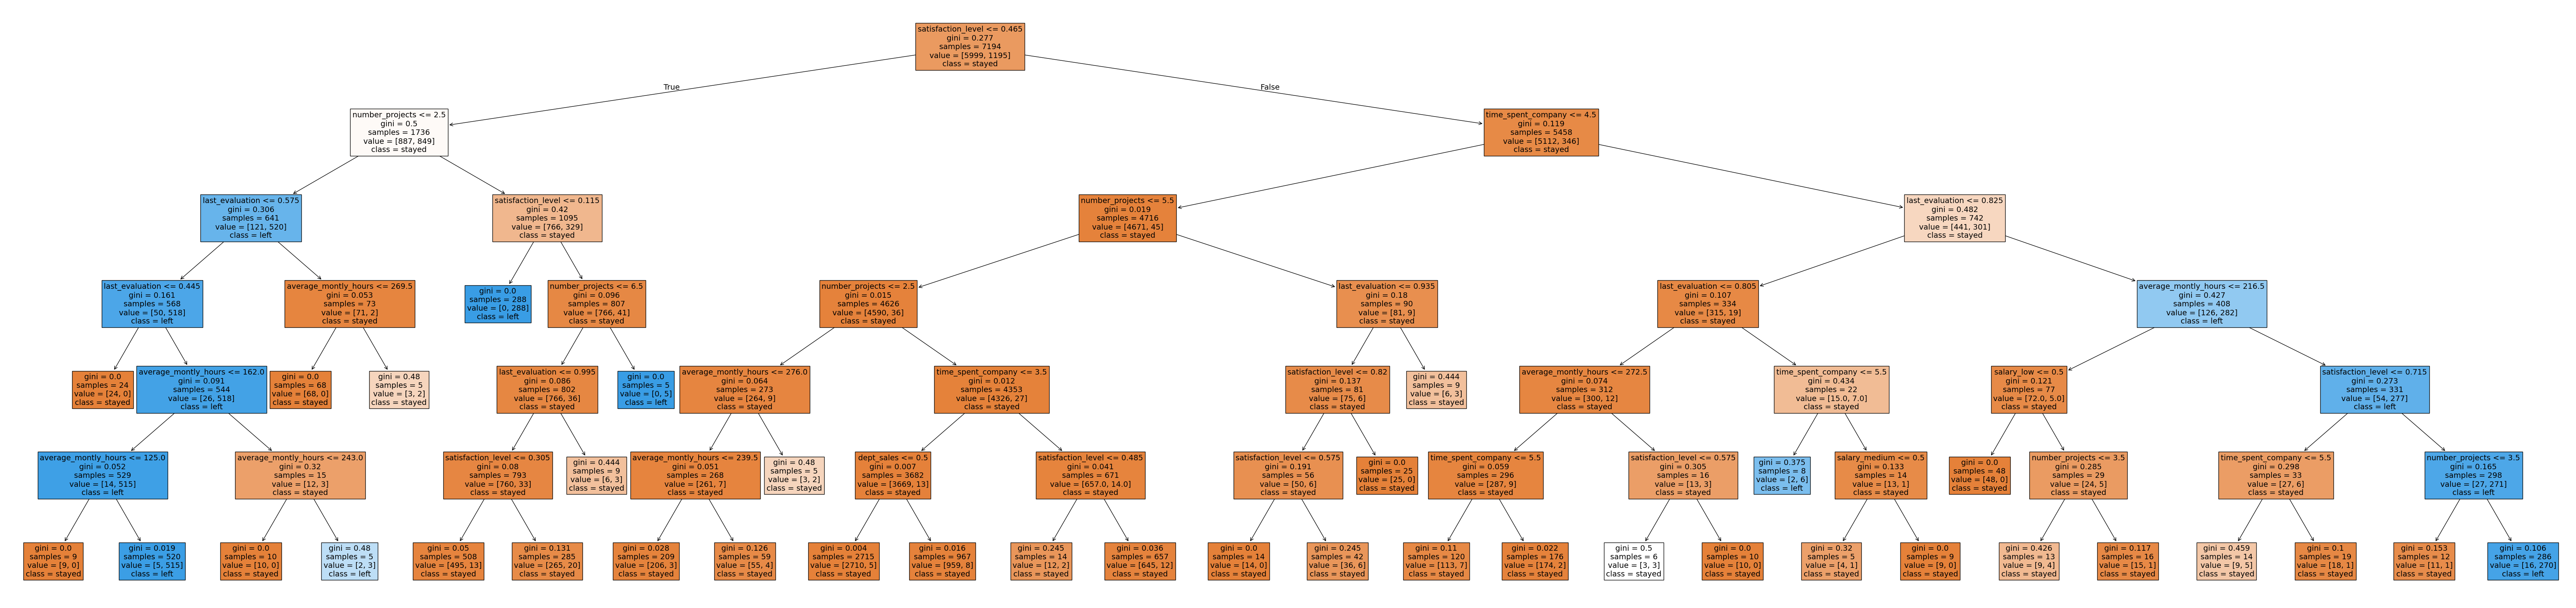

In [42]:
### Decision tree splits ###
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree1.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

### Decision Tree feature importance 

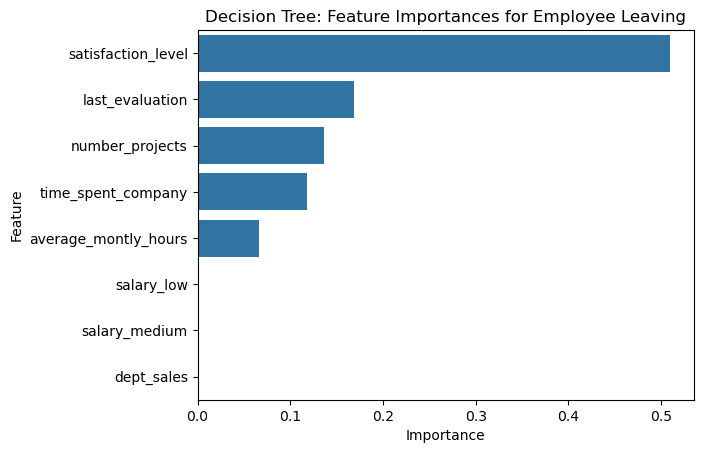

In [46]:
### Decision Tree feature importance ###
# Importance/weight of each feature (key) in the Decision Tree
import seaborn as sns

# Extract the importance of the feature and sort them in descending order
tree1_importances = pd.DataFrame(tree1.best_estimator_.feature_importances_, columns=['gini_importance'], index=X.columns)
tree1_importances = tree1_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree1_importances = tree1_importances[tree1_importances['gini_importance'] != 0]
tree1_importances

# Create a barplot visualization of the importance
sns.barplot(data=tree1_importances, x="gini_importance", y=tree1_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

### Random Forest feature importance

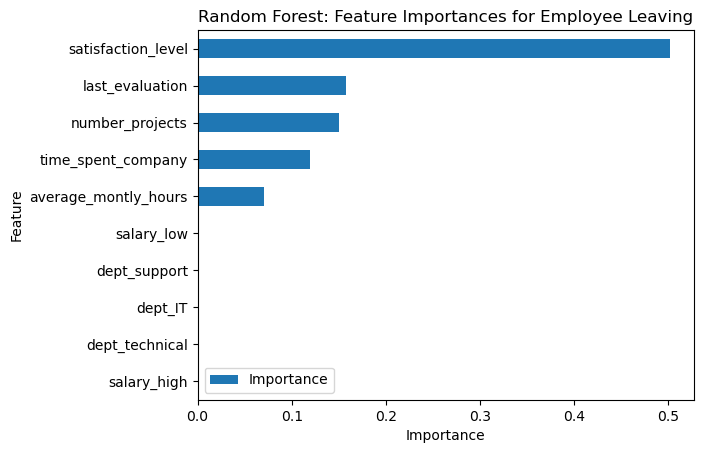

In [47]:
### Random Forest feature importance ###

# Get feature importances
feat_impt = rf1.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

### Summary of model results

**Logistic Regression:**
The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning:**
On the test set, the decision tree model and the random forest models achieved similar precision,	recall,	f1, and	accuracy (below). Both models performed much better than the Logistic Regression, with a precision surpassing 95%.

| Model           | AUC  | Precision | Recall | F1   | Accuracy |
|------------------|------|-----------|--------|------|----------|
| Decision Tree   | 0.954 | 0.966     | 0.915  | 0.939 | 0.98     |
| Random Forest   | 0.954 | 0.960     | 0.915  | 0.937 | 0.98     |



### Conclusion and Recommendations

#### Key Takeaways

•	A low satisfaction level is the major indicator for an employee to leave. This means that employees that were considering leaving spoke with HR and no effective remedies were proposed. So, management should listen to their employees.

•	There is no correlation between promotions and high salary with a good evaluation, more working hours, or projects. This is a strong indicator of a non-meritocratic working environment, where high performers may feel pressured to leave. We recommend the management to introduce Key Performance Indicators to measure the performance of employees, and to dispense promotions and raises accordingly.

#### The employees who LEFT can be divided in 3 groups:

•	Unhappy Overachievers (UO): very low satisfaction, very high project number and working hours, low salary. These are high achievers that were not happy because of not being recognized and/or appreciated. Moreover, the fragmentation of work between many different projects, together with long working hours, can contribute to burnout and depression. We definitely want to keep these employees. We recommend a promotion or increasing their salary to improve retention, and to decrease their number of projects to prevent burnout. 

•	Unhappy Underachievers (UU): low satisfaction, low project number and working hours, low salary. They are probably employees who got fired, were quietly quitting or already looking for a new job. We may not be interested in keeping these employees. 

•	Happy Overachievers (HO): high satisfaction, high project number and working hours, low salary. We want to keep these employees. We recommend a promotion and increasing their salary.
